In [1]:
!pip install astropy

     ---------------------------------------- 6.4/6.4 MB 9.8 MB/s eta 0:00:00


     -------------------------------------- 366.4/366.4 KB 7.6 MB/s eta 0:00:00


In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [3]:
import numpy as np
import itertools
import matplotlib.pyplot as plt
import seaborn as sns
from astropy.timeseries import LombScargle

In [39]:
#Simulate some time series data with a ground-truth seasonality (in this case sin(2pi*ft)) where t si time and f is a frequency
rand = np.random.RandomState(123)
f = np.pi
t = 200 * rand.rand(200)
# underlying signal or ground truth
y = 3*np.sin(2 * np.pi *f* t) + 3 * rand.randn(200)
#y = 3*rand.randn(200)

In [40]:
np.sort(t)

array([  0.53761291,   1.48527571,   3.22584134,   5.86394458,
         6.43958699,   8.71829276,   9.71580657,  11.93557932,
        15.82979215,  15.87315808,  16.35601742,  16.63899767,
        16.98083264,  18.42098799,  18.66534207,  19.14250332,
        21.18169701,  22.27843432,  23.12367902,  24.1257332 ,
        24.35087109,  24.44870993,  25.7262395 ,  26.17899013,
        27.68311456,  30.22549047,  30.61410302,  31.79192883,
        32.21380289,  33.18757684,  34.21636584,  35.09035123,
        36.49834609,  38.84459212,  40.27990028,  40.90857191,
        41.21914549,  41.52717224,  45.37029071,  45.65264618,
        48.17117954,  48.73327491,  50.09107308,  51.50841283,
        57.22786699,  57.30732335,  58.49788256,  58.74280928,
        59.3721551 ,  60.82415781,  60.95361468,  61.29395067,
        62.45224459,  63.35757942,  63.45709636,  63.75328528,
        64.39612129,  64.59178277,  67.41327669,  67.73416918,
        68.55276675,  68.63560323,  68.69120281,  70.85

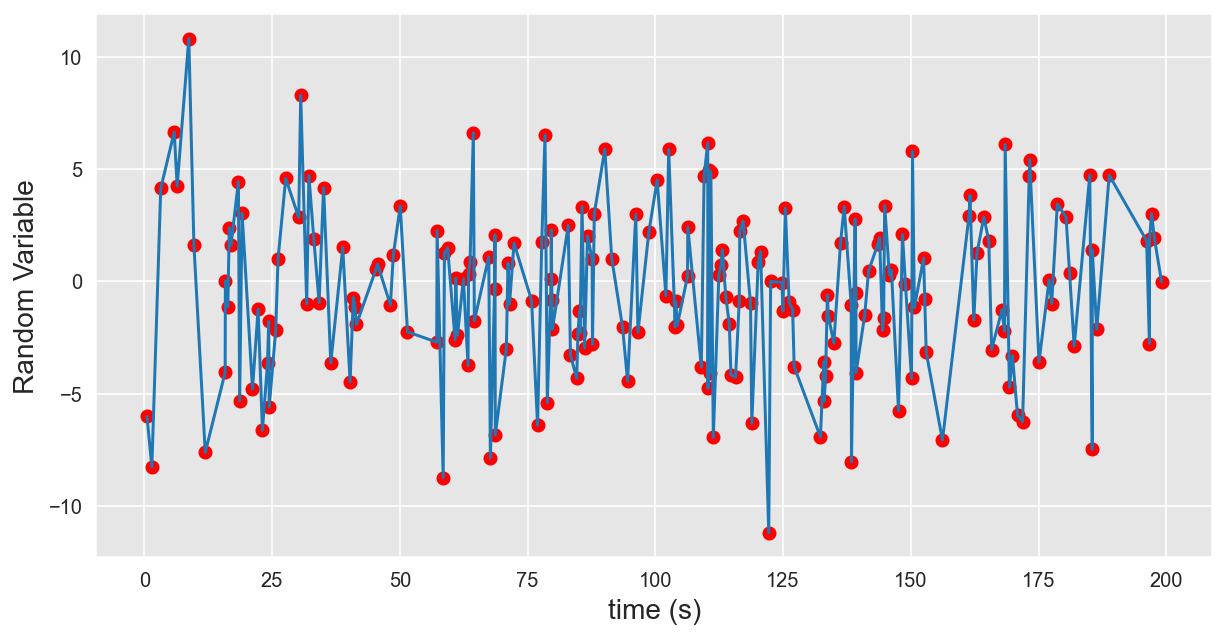

<Figure size 9000x3000 with 0 Axes>

In [41]:
new_t, new_y = zip(*sorted(zip(t, y)))
plt.scatter(new_t,new_y,color='r')
plt.xlabel('time (s)', fontsize=14)
plt.ylabel('Random Variable', fontsize=14)
plt.plot(new_t,new_y)
plt.figure(figsize=(30,10),dpi=300)
plt.rcParams['figure.figsize'] = [10, 5]
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
plt.show()

In [42]:
# LombScargle gives frequency and power if you give it data and mix/max frequency bounds in Hz
# Power is a LombScargle measure of importance, like variable selection. High power means expect a repitition at that frequency
frequency, power = LombScargle(t, y).autopower(minimum_frequency=0.1,maximum_frequency=10)

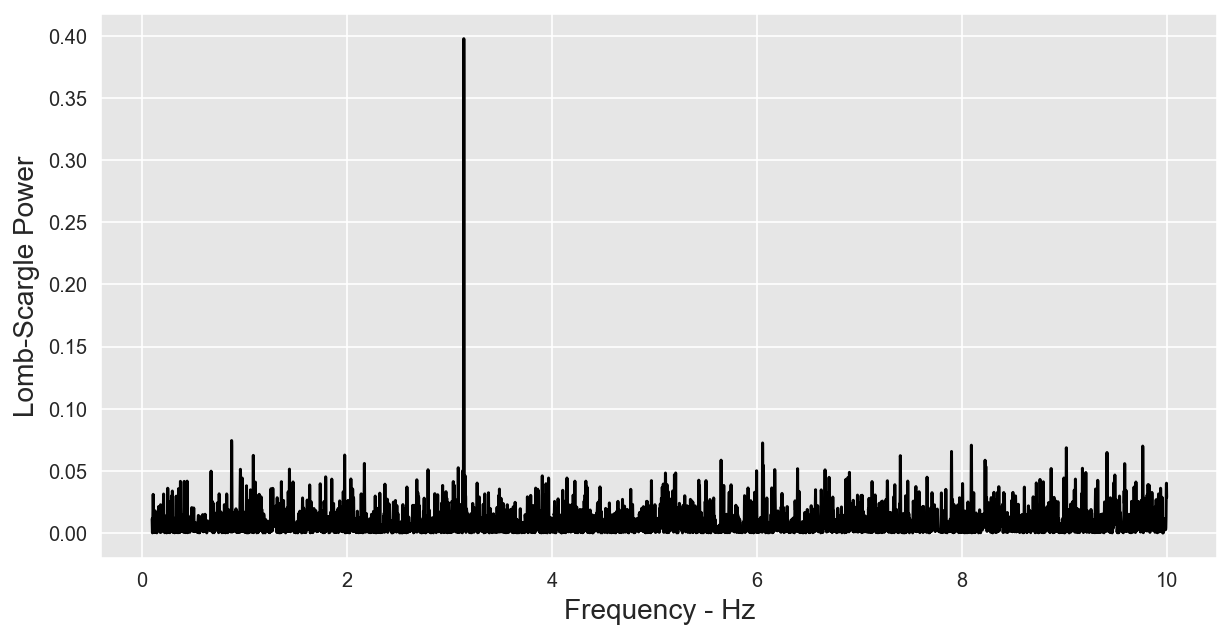

In [43]:
plt.plot(frequency, power,'-k')
plt.xlabel('Frequency - Hz', fontsize=14)
plt.ylabel('Lomb-Scargle Power', fontsize=14)
plt.show()

In [44]:
best_frequency = frequency[np.argmax(power)]
t_fit = np.linspace(0,1)
ls = LombScargle(t, y)
y_fit = ls.model(t_fit/best_frequency, best_frequency)

In [45]:
best_frequency

3.14129139631843

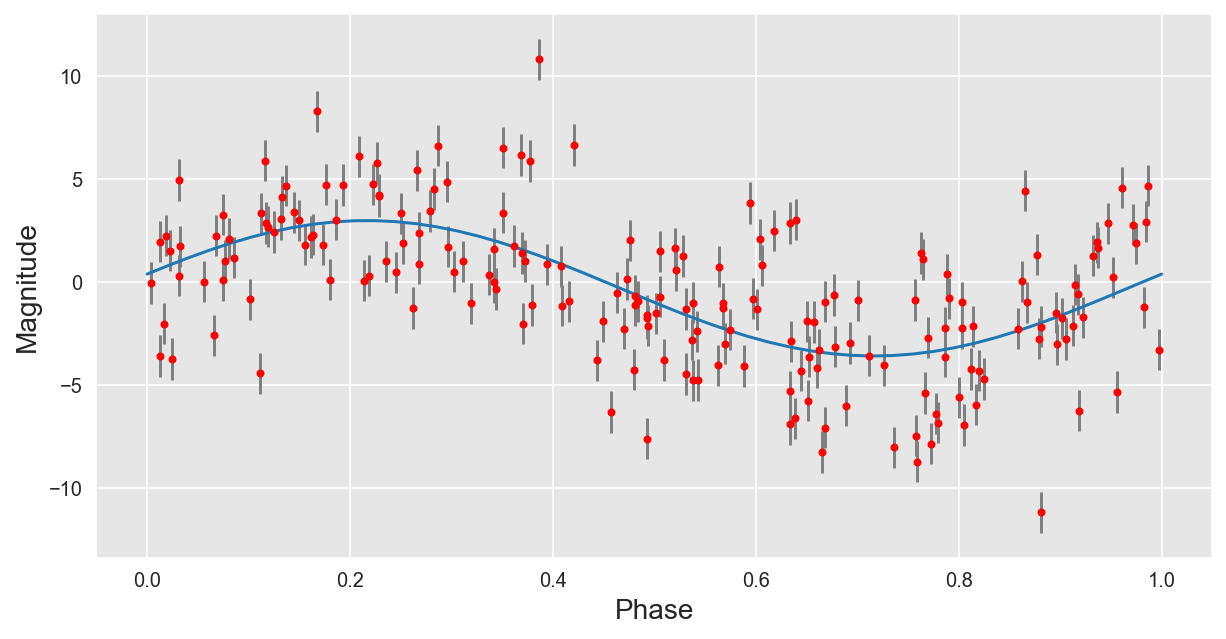

In [46]:
# Graph of magnitude (how well it fit) that each trig polynomial that LombScargle
fig, ax = plt.subplots()
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
ax.errorbar((t*best_frequency-np.fix(t*best_frequency)),y, 1, fmt='.r', ecolor='gray')
ax.set_xlabel('Phase', fontsize=14)
ax.set_ylabel('Magnitude', fontsize=14)
ax.plot(t_fit,y_fit)
plt.rcParams['figure.figsize'] = [8, 5]
plt.show()

In [ ]:
np.argmax(power)

661

In [ ]:
frequency[np.argmax(power)]

1.450041336889499

In [ ]:
1/(65*0.001)

15.384615384615383